# Содержание
1. [Изучение данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Расчеты и добавление рузльатов в таблицу](#results)
4. [Исследовательский анализ данных](#EDA)
5. [Выводы](#conclusion)


# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

##  <a id="start">Изучение данных из файла</a>

### Описание данных
1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. first_day_exposition — дата публикации
7. floor — этаж
8. floors_total — всего этажей в доме
9. is_apartment — апартаменты (булев тип)
10. kitchen_area — площадь кухни в квадратных метрах (м²)
11. last_price — цена на момент снятия с публикации
12. living_area — жилая площадь в квадратных метрах(м²)
13. locality_name — название населённого пункта
14. open_plan — свободная планировка (булев тип)
15. parks_around3000 — число парков в радиусе 3 км
16. parks_nearest — расстояние до ближайшего парка (м)
17. ponds_around3000 — число водоёмов в радиусе 3 км
18. ponds_nearest — расстояние до ближайшего водоёма (м)
19. rooms — число комнат
20. studio — квартира-студия (булев тип)
21. total_area — площадь квартиры в квадратных метрах (м²)
22. total_images — число фотографий квартиры в объявлении

### Import ###

In [260]:
!pip install missingno


In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('bmh')

### Read data ###

In [262]:
df = pd.read_csv('data/real_estate_data.csv', sep='\t')

### Info ###

In [263]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [264]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Процент пропущенных значений

<AxesSubplot:>

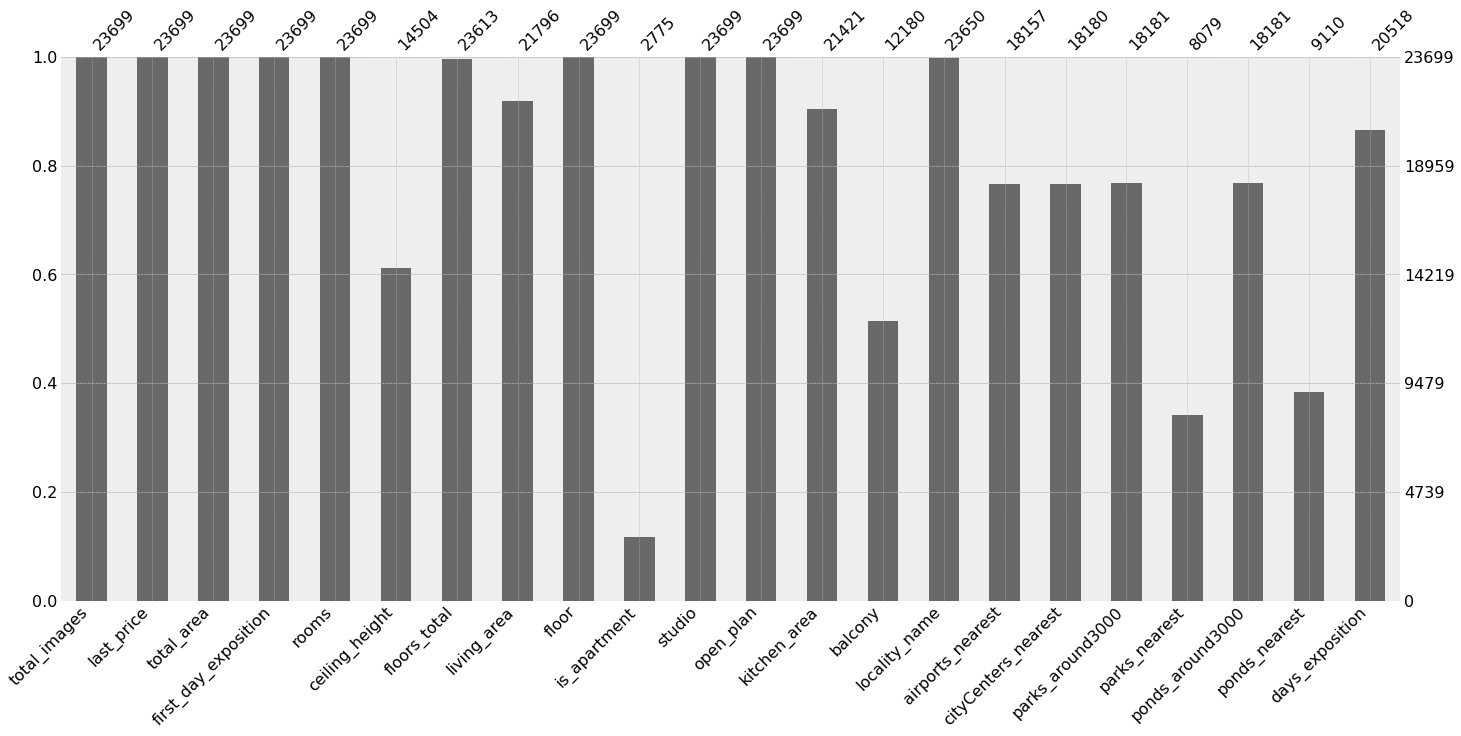

In [265]:
msno.bar(df)

Поиск дубликатов

In [266]:
df.duplicated().sum()

0

In [267]:
(100*df.isnull().mean()).round()

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          39.0
floors_total             0.0
living_area              8.0
floor                    0.0
is_apartment            88.0
studio                   0.0
open_plan                0.0
kitchen_area            10.0
balcony                 49.0
locality_name            0.0
airports_nearest        23.0
cityCenters_nearest     23.0
parks_around3000        23.0
parks_nearest           66.0
ponds_around3000        23.0
ponds_nearest           62.0
days_exposition         13.0
dtype: float64

### <a name="start">Вывод</a>

| Столбец              | Пропуски % | Замена типа |
|----------------------|:----------:|------------:|
| total_images         |    0.0     |           - |
| last_price           |    0.0     |           - |
| total_area           |    0.0     |           - |
| first_day_exposition |    0.0     |        date |
| rooms                |    0.0     |           - |
| ceiling_height       |    39.0    |           - |
| floors_total         |    0.0     |         int |
| living_area          |    8.0     |           - |
| floor                |    0.0     |           - |
| is_apartment         |    88.0    |        bool |
| studio               |    0.0     |           - |
| open_plan            |    0.0     |           - |
| kitchen_area         |    10.0    |           - |
| balcony              |    49.0    |         int |
| locality_name        |    0.0     |           - |
| airports_nearest     |    23.0    |           - |
| cityCenters_nearest  |    23.0    |           - |
| parks_around3000     |    23.0    |           - |
| parks_nearest        |    66.0    |           - |
| ponds_around3000     |    23.0    |           - |
| ponds_nearest |    62.0    |           - |
| days_exposition |    13.0    |         int |



## <a id="preprocessing">Предобработка данных</a>

In [268]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [269]:
df['balcony']=df['balcony'].fillna(0)

In [270]:
df['locality_name'].isna().sum()

49

In [271]:
df = df.loc[df['locality_name'].notna()]

Удалили пропуски в locality_name, т.к. невозможно определить по другим столбцам местоположение квартиры

In [272]:
df.loc[df['rooms']==0]['living_area'].describe()

count    183.000000
mean      18.865246
std        6.549527
min        2.000000
25%       16.000000
50%       18.000000
75%       19.950000
max       68.000000
Name: living_area, dtype: float64

In [273]:
df.loc[df['rooms']==0]['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

In [274]:
df.loc[(df['rooms']==0) & (df['studio'] == True),'rooms']=1

Изменили количество комнат в студии на 1

In [275]:
df.loc[df['rooms']==0]['living_area'].describe()

count    55.000000
mean     18.585455
std       3.464552
min      10.500000
25%      17.000000
50%      18.000000
75%      20.000000
max      25.700000
Name: living_area, dtype: float64

Максимальная площадь <26, можно сделать вывод, что это однушки

In [276]:
df.loc[df['rooms']==0,'rooms']=1

In [277]:
df.loc[df['kitchen_area'].isna()]['studio'].value_counts()

False    2120
True      149
Name: studio, dtype: int64

In [278]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [279]:
def total_area_group(row):
    area = row['total_area']
    if area <= 40:
        return 'S'
    elif area <= 52:
        return 'M'
    elif area<= 69.7:
        return 'L'
    return 'XL'

Создали функцию для группировки площади квартиры по метражу согласно квартилям для дальнейшей замены пропусков медианными значениями

In [280]:
df['total_area_group'] = df.apply(total_area_group, axis=1)

In [281]:
total_area_median = df.groupby('total_area_group')['total_area'].median()

In [282]:
total_area_median

total_area_group
L     60.0
M     45.0
S     34.0
XL    87.0
Name: total_area, dtype: float64

In [283]:
living_area_median = df.groupby('total_area_group')['living_area'].median()

In [284]:
living_area_median

total_area_group
L     35.5
M     27.4
S     17.2
XL    51.2
Name: living_area, dtype: float64

In [285]:
kitchen_area_median = df.groupby('total_area_group')['kitchen_area'].median()

In [286]:
kitchen_area_median

total_area_group
L      9.00
M      8.00
S      8.25
XL    13.00
Name: kitchen_area, dtype: float64

In [287]:
kitchen_coefficient = (kitchen_area_median / total_area_median).to_dict()

In [288]:
kitchen_coefficient

{'L': 0.15,
 'M': 0.17777777777777778,
 'S': 0.2426470588235294,
 'XL': 0.14942528735632185}

In [289]:
living_coefficient = (living_area_median / total_area_median).to_dict()

In [290]:
living_coefficient

{'L': 0.5916666666666667,
 'M': 0.6088888888888888,
 'S': 0.5058823529411764,
 'XL': 0.5885057471264368}

In [291]:
for key,value in kitchen_coefficient.items():
    df.loc[df['kitchen_area'].isna() & (df['total_area_group']== key),'kitchen_area'] = value*df['total_area']

In [292]:
df['kitchen_area'].min()

1.3

In [293]:
df['kitchen_area'].isna().sum()

0

In [294]:
for key,value in living_coefficient.items():
    df.loc[((df['living_area'].isna()) | (df['living_area']==0)) & (df['total_area_group']== key),'living_area'] = value*df['total_area']

In [295]:
df['living_area'].describe()

count    23650.00000
mean        34.63976
std         22.47378
min          2.00000
25%         18.80000
50%         30.00000
75%         42.24500
max        409.70000
Name: living_area, dtype: float64

In [296]:
df['living_area'].isna().sum()

0

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [298]:
df['locality_name'] =df['locality_name'].str.replace('ё', 'е').str.lower()

In [299]:
bad_words = ['поселок городского типа ','садоводческое некоммерческое товарищество ',
             'садовое товарищество ','городской поселок ','коттеджный поселок ','поселок пансионат ',
             'поселок при железнодорожной станции ','поселок ','деревня ','село ']

In [300]:
for word in bad_words:
    df['locality_name'] = df['locality_name'].str.replace(word,'')

In [301]:
df['locality_name'].value_counts()

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
                   ...  
алексеевка             1
белоостров             1
пельгора               1
каложицы               1
дзержинского           1
Name: locality_name, Length: 308, dtype: int64

In [302]:
df['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

In [303]:
ceiling_median = df.groupby('locality_name')['ceiling_height'].median().to_dict()

In [304]:
ceiling_median 

{'агалатово': 2.6,
 'александровская': 2.77,
 'алексеевка': nan,
 'аннино': 2.55,
 'аро': nan,
 'барышево': 2.55,
 'батово': 2.5,
 'бегуницы': 2.6,
 'белогорка': 2.5,
 'белоостров': nan,
 'бокситогорск': 3.9,
 'большая вруда': 2.5,
 'большая ижора': 2.575,
 'большая пустомержа': 2.5,
 'большие колпаны': 2.5,
 'большое рейзино': nan,
 'большой сабск': nan,
 'бор': 2.95,
 'борисова грива': 2.7,
 'бугры': 2.6,
 'будогощь': 2.615,
 'ваганово': 3.15,
 'важины': 2.55,
 'вартемяги': 2.7,
 'вахнова кара': 2.65,
 'вещево': 2.5,
 'виллози': 2.6,
 'вознесенье': nan,
 'возрождение': 2.5,
 'войсковицы': 2.55,
 'войскорово': 2.5,
 'володарское': nan,
 'волосово': 2.5,
 'волхов': 2.58,
 'всеволожск': 2.7,
 'выборг': 2.55,
 'вырица': 2.55,
 'выскатка': nan,
 'высокоключевой': nan,
 'высоцк': 2.5,
 'гаврилово': 2.5,
 'гарболово': 2.525,
 'гатчина': 2.55,
 'гладкое': 2.6,
 'глажево': 2.5,
 'глебычево': 2.5,
 'глинка': 3.1,
 'гончарово': 2.6,
 'горбунки': 2.55,
 'гостилицы': 2.5,
 'громово': 2.55,
 'дзер

In [305]:
for key,value in ceiling_median.items():
    df.loc[df['ceiling_height'].isna() & (df['locality_name']== key),'ceiling_height'] = value

Заполнили пропуски медианными значениями для каждого населенного пункта

In [306]:
df['ceiling_height'].isna().sum()

95

In [307]:
neighbors_ceiling_median = df.loc[(df['ceiling_height'].notna()) & 
                                       (df['locality_name'] != 'санкт-петербург')]['ceiling_height'].median()

In [308]:
neighbors_ceiling_median

2.6

In [309]:
df['ceiling_height'] = df['ceiling_height'].fillna(neighbors_ceiling_median)

In [310]:
df['ceiling_height'].isna().sum()

0

Оставшиеся пропуски приходятся на пригород, заполнили их медианными значениями для пригорода

In [311]:
city_centers_median = df.groupby('locality_name')['cityCenters_nearest'].median()

In [312]:
city_centers_median.to_dict()

{'агалатово': nan,
 'александровская': 27468.0,
 'алексеевка': nan,
 'аннино': nan,
 'аро': nan,
 'барышево': nan,
 'батово': nan,
 'бегуницы': nan,
 'белогорка': nan,
 'белоостров': 38868.0,
 'бокситогорск': nan,
 'большая вруда': nan,
 'большая ижора': nan,
 'большая пустомержа': nan,
 'большие колпаны': nan,
 'большое рейзино': nan,
 'большой сабск': nan,
 'бор': nan,
 'борисова грива': nan,
 'бугры': nan,
 'будогощь': nan,
 'ваганово': nan,
 'важины': nan,
 'вартемяги': nan,
 'вахнова кара': nan,
 'вещево': nan,
 'виллози': nan,
 'вознесенье': nan,
 'возрождение': nan,
 'войсковицы': nan,
 'войскорово': nan,
 'володарское': nan,
 'волосово': nan,
 'волхов': nan,
 'всеволожск': nan,
 'выборг': nan,
 'вырица': nan,
 'выскатка': nan,
 'высокоключевой': nan,
 'высоцк': nan,
 'гаврилово': nan,
 'гарболово': nan,
 'гатчина': nan,
 'гладкое': nan,
 'глажево': nan,
 'глебычево': nan,
 'глинка': nan,
 'гончарово': nan,
 'горбунки': nan,
 'гостилицы': nan,
 'громово': nan,
 'дзержинского': n

In [313]:
for key,value in city_centers_median.items():
    df.loc[df['cityCenters_nearest'].isna() & (df['locality_name']== key),'cityCenters_nearest'] = value

In [314]:
df['cityCenters_nearest'].isna().sum()

4829

Заполнили пропуски медианными значениями по населенным пунктам, т.к. осталось 4829 пропусков, заполним их медианным значением среди населенных пунктов в окрестностях Санкт-Петербурга

In [315]:
neighbors_cityCenters_median = df.loc[(df['cityCenters_nearest'].notna()) & 
                                       (df['locality_name'] != 'санкт-петербург')]['cityCenters_nearest'].median()

In [316]:
neighbors_cityCenters_median

28813.5

In [317]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(neighbors_cityCenters_median)


In [318]:
df['cityCenters_nearest'].isna().sum()

0

In [319]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,XL
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.600000,1,False,...,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,M
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.300000,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,L
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,93.572414,9,False,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,XL
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,XL


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [321]:
df = df.loc[df['floors_total'].notna()]

In [322]:
df['floors_total'] = df['floors_total'].astype('int')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int32  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [324]:
df['living_area'] = df['living_area'].astype('int')

In [325]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Сменил тип стобцов на int, отформатировал дату, убрал строки с пропущенными данными о количестве этажей в доме

In [326]:
df.duplicated().sum()

0

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  int32         
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [328]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,XL
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18,1,False,...,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,M
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,L
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,93,9,False,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,XL
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,XL


# Вывод

Избавился от пропусков в данных, т.к. столбцы с парками в анализе не участвуют, оставил их без изменений

## <a id="preprocessing">Рассчёты и добавление результатов в таблицу</a>

In [329]:
df['price_for_meter']=df['last_price']/df['total_area']

Рассчитал цену за квадратный метр и добавил новый столбец

In [330]:
df['publication_day']= df['first_day_exposition'].dt.weekday

In [331]:
df['publication_month']= df['first_day_exposition'].dt.month

In [332]:
df['publication_year']= df['first_day_exposition'].dt.year

Добавил столбцы  с днем недели, месяцем и годом подачи объявления

In [333]:
df['publication_day'].value_counts()

3    4276
1    4163
4    3980
2    3948
0    3596
5    1919
6    1683
Name: publication_day, dtype: int64

In [334]:
df['publication_month'].value_counts()

2     2636
3     2575
11    2360
4     2356
10    2108
9     1972
6     1747
8     1739
7     1686
12    1638
1     1487
5     1261
Name: publication_month, dtype: int64

In [335]:
df['publication_year'].value_counts()

2018    8486
2017    8161
2019    2871
2016    2745
2015    1166
2014     136
Name: publication_year, dtype: int64

In [336]:
def floors_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'

    return 'другой'

In [337]:
df['floor_group'] = df.apply(floors_group, axis=1)

Создал функцию группировки этажа и добавил новый столбец

In [338]:
df['living_coefficient']=df['living_area']/df['total_area']

In [339]:
df['kitchen_coefficient']=df['kitchen_area']/df['total_area']

Добавил коэффициенты отношения кухни и жилой площади к общей

In [340]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_group,price_for_meter,publication_day,publication_month,publication_year,floor_group,living_coefficient,kitchen_coefficient
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51,8,False,...,755.0,NaN,XL,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18,1,False,...,NaN,81.0,M,82920.792079,1,12,2018,первый,0.445545,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34,4,False,...,574.0,558.0,L,92785.714286,3,8,2015,другой,0.607143,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,93,9,False,...,234.0,424.0,XL,408176.100629,4,7,2015,другой,0.584906,0.149425
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32,13,False,...,48.0,121.0,XL,100000.000000,1,6,2018,другой,0.320000,0.410000


## <a id="EDA">Исследовательский анализ данных</a>

In [341]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'total_area_group',
       'price_for_meter', 'publication_day', 'publication_month',
       'publication_year', 'floor_group', 'living_coefficient',
       'kitchen_coefficient'],
      dtype='object')

In [342]:
stat_columns=['total_area', 'last_price','rooms','ceiling_height','days_exposition']

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64
count    23565.000000
mean         2.078888
std          1.066503
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
count    23565.000000
mean         2.731895
std          1.004443
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1

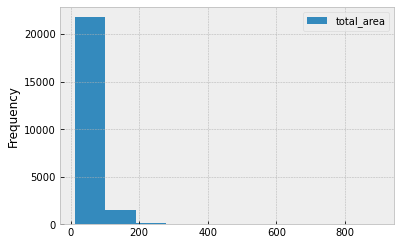

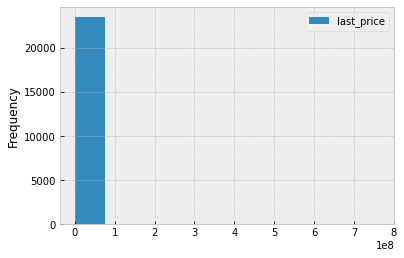

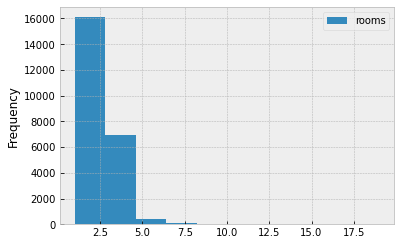

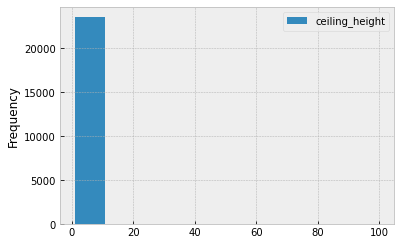

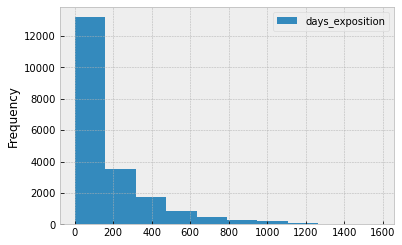

In [343]:
for column in stat_columns:
    print(df[column].describe())
    df.plot(kind='hist',y=column, bins=10,grid=True,legend=True)

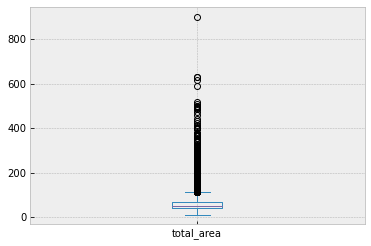

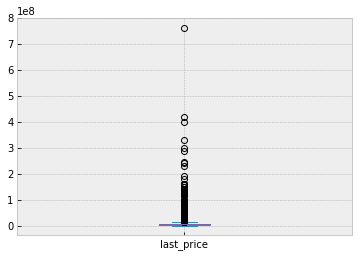

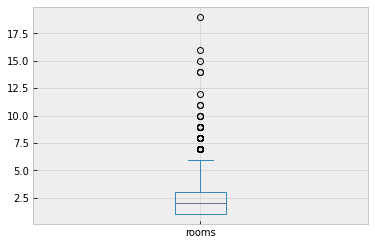

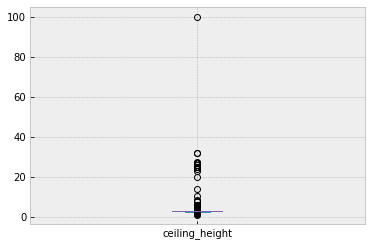

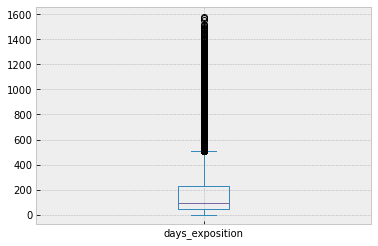

In [344]:
for column in stat_columns:
    df.plot(kind='box',y=column,grid=True,legend=True)

Как видно из гистограмм, по всем параметрам максимальная частота наблюдений приходится на начало гистаграммы, информативность искажена наличием выбросов преимущественно в районе максимума показателей

<AxesSubplot:xlabel='days_exposition'>

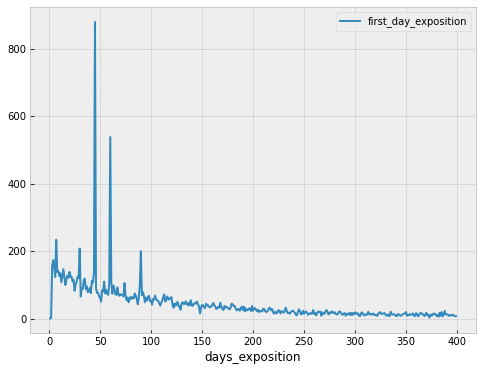

In [345]:
(
    df
    .query('days_exposition <400')
    .pivot_table(index='days_exposition', values='first_day_exposition', aggfunc='count')
    .plot(grid=True, figsize=(8, 6))
)

<AxesSubplot:xlabel='days_exposition'>

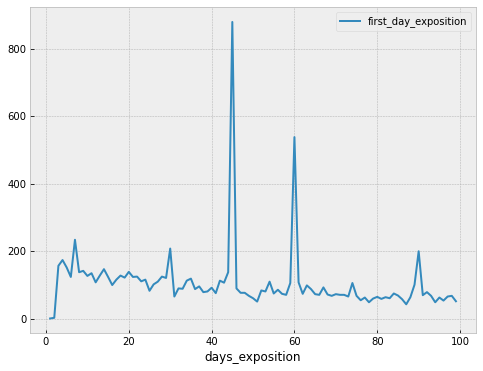

In [346]:
(
    df
    .query('days_exposition <100')
    .pivot_table(index='days_exposition', values='first_day_exposition', aggfunc='count')
    .plot(grid=True, figsize=(8, 6))
)

Как видно из гистограмм по всем параметрам имеются выбросы, которые надо устранить.

В 50% случаев продажа квартиры занимает меньше 101 дня. Среднее значение составило 185 дней вследствие наличия выбросов. Наблюдаются резкие скачки продаж в срок 45 и 60 дней,начиная с 90 дня количество продаж плавно затухает. Сроки в 45 и 60 дней возможно связаны с бронированием квартир с дальнейшим выкупом

Для последующей фильтрации от выбросов скопировали текущий df

In [347]:
def subset_by_iqr(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filter = (df[column] >= q1 - 1.5*iqr) & (df[column] <= q3 + 1.5*iqr)
    print(column, 'Нижняя граница -',q1 - 1.5*iqr,' Верхняя граница - ',q3 + 1.5*iqr)
    return df.loc[filter][column]                                                     

                                                 

In [348]:
total_area = subset_by_iqr('total_area')
last_price = subset_by_iqr('last_price')
rooms = subset_by_iqr('rooms')
ceiling_height = subset_by_iqr('ceiling_height')
days_exposition = subset_by_iqr('days_exposition')

total_area Нижняя граница - -4.550000000000004  Верхняя граница -  114.25
last_price Нижняя граница - -1685000.0  Верхняя граница -  11875000.0
rooms Нижняя граница - -2.0  Верхняя граница -  6.0
ceiling_height Нижняя граница - 2.3249999999999993  Верхняя граница -  2.9250000000000007
days_exposition Нижняя граница - -234.0  Верхняя граница -  510.0


22326

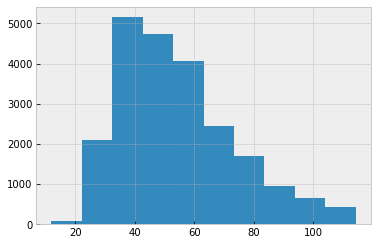

In [349]:
total_area.hist()
total_area.count()

<AxesSubplot:>

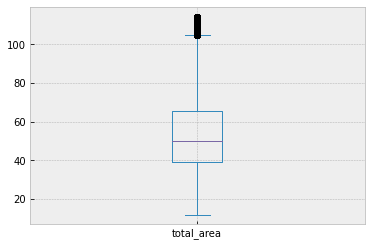

In [350]:
total_area.plot.box()

21519

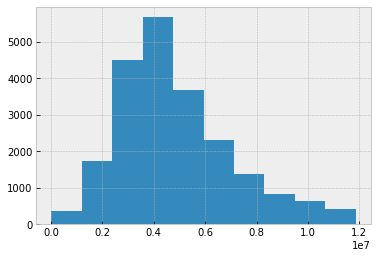

In [351]:
last_price.hist()
last_price.count()

21519

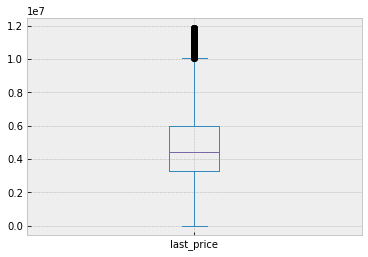

In [352]:
last_price.plot.box()
last_price.count()

<AxesSubplot:>

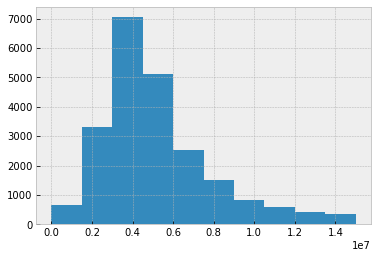

In [353]:
df['last_price'].hist(grid = True,range = (0,15000000))

23475

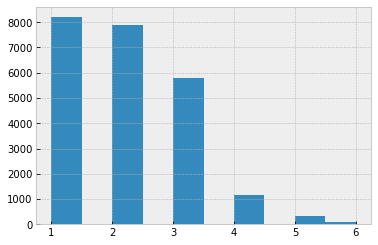

In [354]:
rooms.hist()
rooms.count()

<AxesSubplot:>

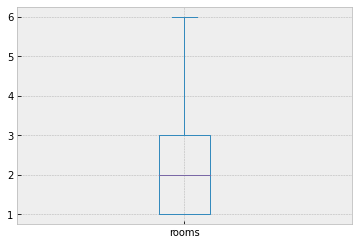

In [355]:
rooms.plot.box()

20829

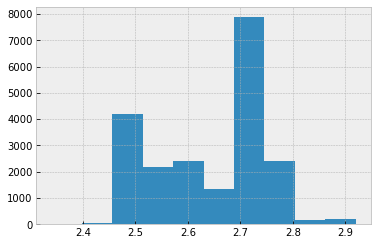

In [356]:
ceiling_height.hist()
ceiling_height.count()

<AxesSubplot:>

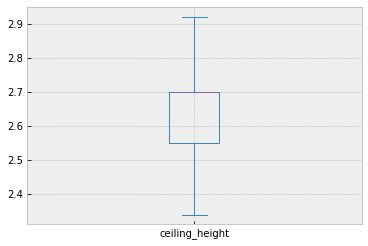

In [357]:
ceiling_height.plot.box()

18727

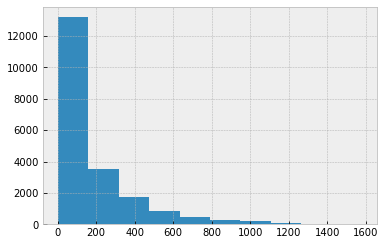

In [358]:
df['days_exposition'].hist()
days_exposition.count()

<AxesSubplot:>

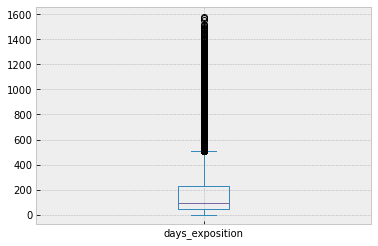

In [359]:
df['days_exposition'].plot.box()

In [360]:
df_filtered = df.query('total_area <=115 and last_price <= 12000000 and rooms <=6 and 2.3 <= ceiling_height <=3')


Для фильтрации была применена функция расчета IQR для удаления выбросов. Большая часть выбросов приходится на дату размещения объявления, чтобы не потерять эти данные, фильтровать по этому столбцу не будем.
Цена на недвижимость  и общая площадь приближается к нормальному распределению, days_exposition,rooms, представляют собой распределение Пуассона, высота потолков имеет 2 максимума - в районе 2.5 и 2.7 метров

In [361]:
df_correlation = pd.DataFrame(df_filtered,columns=['last_price','rooms','cityCenters_nearest','ceiling_height','total_area',
                                                   'floor','publication_day','publication_month',
                                                  'publication_year','floor_group'])

In [362]:
corr = df_correlation.corr()

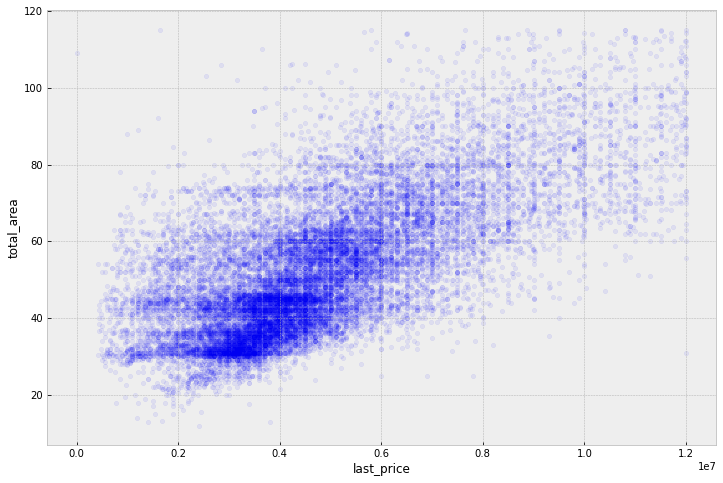

In [363]:
(
    df_correlation
    .plot(x='last_price', y='total_area', kind='scatter',  figsize=(12, 8), sharex=True, grid=True, alpha=0.07)
)
plt.show()

Средняя корреляция наблюдается между ценой и площадью квартиры(чем выше стоимость, тем больше метраж). Слабая корреляция наблюдается между ценой и расстоянием до центра, высотой потолков и количеством комнат.


In [364]:
top_cities = ( 
    df_filtered
    .pivot_table(index='locality_name', values='last_price', aggfunc='count')
    .sort_values(by='last_price', ascending=False)
    .head(10)
)['last_price'].to_dict()

In [365]:
top_cities

{'санкт-петербург': 12851,
 'мурино': 584,
 'кудрово': 467,
 'шушары': 435,
 'всеволожск': 389,
 'парголово': 326,
 'колпино': 325,
 'пушкин': 324,
 'гатчина': 297,
 'выборг': 214}

In [366]:
top_cities_list=[]
for key,value in top_cities.items():
    top_cities_list.append(key)
top_cities_list

['санкт-петербург',
 'мурино',
 'кудрово',
 'шушары',
 'всеволожск',
 'парголово',
 'колпино',
 'пушкин',
 'гатчина',
 'выборг']

In [367]:
(
df_filtered 
.query('locality_name in @top_cities_list')
.pivot_table(index='locality_name', values='price_for_meter', aggfunc='mean')
.sort_values(by='price_for_meter', ascending=False)
)

,price_for_meter
locality_name,
санкт-петербург,105436.008078
пушкин,100215.767381
кудрово,95087.724999
парголово,90332.263023
мурино,86018.110911
шушары,78555.374108
колпино,75260.693623
гатчина,68558.630588
всеволожск,67215.603113


Самая высока цена на жилье - в Питере, самая низкая - в Выборге

In [368]:
spb = df_filtered.query('locality_name == "санкт-петербург"')

In [369]:
spb.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'total_area_group',
       'price_for_meter', 'publication_day', 'publication_month',
       'publication_year', 'floor_group', 'living_coefficient',
       'kitchen_coefficient'],
      dtype='object')

In [370]:
spb['last_price'].describe()

count    1.285100e+04
mean     5.539495e+06
std      2.046625e+06
min      1.219000e+04
25%      4.000000e+06
50%      5.000000e+06
75%      6.600000e+06
max      1.200000e+07
Name: last_price, dtype: float64

Отфильтровали данные по Питеру и перевели метры в километры с округлением

In [371]:
spb['cityCenters_km'] = (spb['cityCenters_nearest'] / 1000).round().astype('int')

In [372]:
spb['cityCenters_km'].value_counts()

12    1543
15    1466
13    1361
16    1226
14    1221
11    1058
17     827
10     635
9      499
5      428
8      401
6      349
4      322
7      252
18     250
22     195
19     151
3      146
21     111
2      107
23      83
1       65
20      47
26      42
24      26
25      25
28       7
29       4
0        3
27       1
Name: cityCenters_km, dtype: int64

In [373]:
spb_price = spb.groupby('cityCenters_km', as_index = False).agg({'last_price' : 'mean'})

In [374]:
spb_price 

,cityCenters_km,last_price
0,0,6.466667e+06
1,1,7.978600e+06
2,2,7.716215e+06
3,3,7.197780e+06
4,4,7.277428e+06
5,5,7.566637e+06
6,6,7.000323e+06
7,7,6.606781e+06
8,8,6.390010e+06
9,9,5.504588e+06


<AxesSubplot:xlabel='cityCenters_km'>

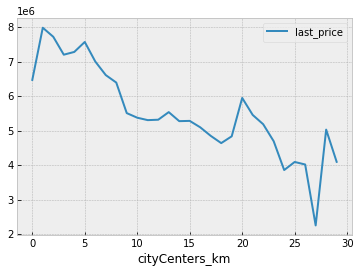

In [375]:
spb_price.plot(x='cityCenters_km', y='last_price', grid=True)

График цен резко меняется при удалении от центра на 8км, будем считать центральной зоной все, что меньше или равно 8км.

In [376]:
spb_center = spb.query('cityCenters_km <=8')

In [377]:
spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 24 to 23691
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          2073 non-null   int64         
 1   last_price            2073 non-null   float64       
 2   total_area            2073 non-null   float64       
 3   first_day_exposition  2073 non-null   datetime64[ns]
 4   rooms                 2073 non-null   int64         
 5   ceiling_height        2073 non-null   float64       
 6   floors_total          2073 non-null   int32         
 7   living_area           2073 non-null   int32         
 8   floor                 2073 non-null   int64         
 9   is_apartment          2073 non-null   bool          
 10  studio                2073 non-null   bool          
 11  open_plan             2073 non-null   bool          
 12  kitchen_area          2073 non-null   float64       
 13  balcony         

In [378]:
spb_center = pd.DataFrame(spb_center,columns=['last_price','rooms','cityCenters_nearest','ceiling_height','total_area',
                                                   'floor','publication_day','publication_month',
                                                  'publication_year'])

In [379]:
spb_center.describe()

,last_price,rooms,cityCenters_nearest,ceiling_height,total_area,floor,publication_day,publication_month,publication_year
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,7.075151e+06,2.154848,5462.150507,2.742388,61.314081,4.465509,2.602026,6.499276,2017.210323
std,2.260172e+06,0.916729,1933.912022,0.135867,20.488216,3.331419,1.749610,3.455051,1.065042
min,1.600000e+06,1.000000,399.000000,2.400000,12.000000,1.000000,0.000000,1.000000,2014.000000
25%,5.350000e+06,1.000000,4204.000000,2.700000,45.000000,2.000000,1.000000,3.000000,2017.000000
50%,6.800000e+06,2.000000,5384.000000,2.700000,59.500000,4.000000,3.000000,6.000000,2017.000000
75%,8.700000e+06,3.000000,7110.000000,2.800000,75.200000,5.000000,4.000000,10.000000,2018.000000
max,1.200000e+07,6.000000,8499.000000,3.000000,115.000000,23.000000,6.000000,12.000000,2019.000000


In [380]:
spb_center_corr = spb_center.corr()

In [381]:
spb_all = pd.DataFrame(spb,columns=['last_price','rooms','cityCenters_nearest','ceiling_height','total_area','floor',
                                                    'publication_day','publication_month',
                                                  'publication_year'])

In [382]:
spb_corr = spb_all.corr()

In [383]:
spb_columns = ['last_price','rooms','cityCenters_nearest','ceiling_height','total_area','floor']

last_price


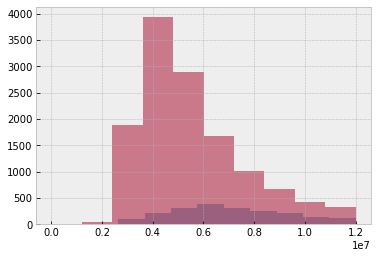

rooms


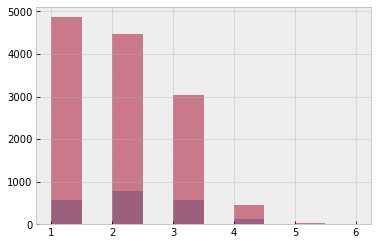

cityCenters_nearest


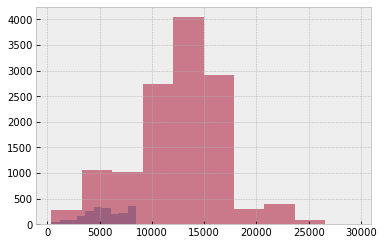

ceiling_height


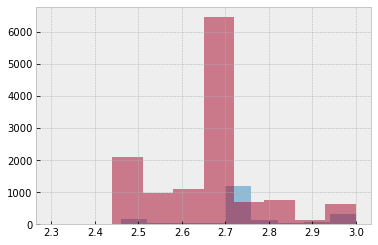

total_area


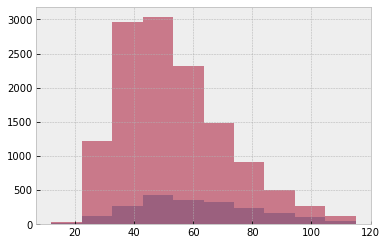

floor


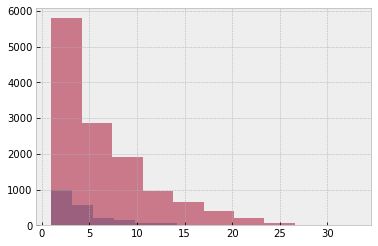

In [384]:
for column in spb_columns:
    print(column)
    spb_center[column].hist(alpha=0.5,grid=True)
    spb_all[column].hist(alpha=0.5,grid=True)
#     plt.hist(spb_all[column],alpha=0.5)
    plt.show()


По данным гистограмм видно, что в центральном районе цена выше чем по всему городу,так же в центре преобладают 2х комнатные квартиры,хотя по всему городу преобладают однушки.Характер показателя количества комнат приблизился к нормальному в выборке по центру города.Высота потолков в большинстве случаев по городу составляет 2.7м., общая площадь продаваемых квартир в обоих случаях чаще всего составляет порядка 50 метров, но в центре не наблюдается такого резкого снижения количества квартир с большей площадью. Как в центре, так и по всему Санкт-Петербурге в основном продают квартиры до 5 этажа, что логично, так как в городе в основном преобладают малоэтажки.

<AxesSubplot:>

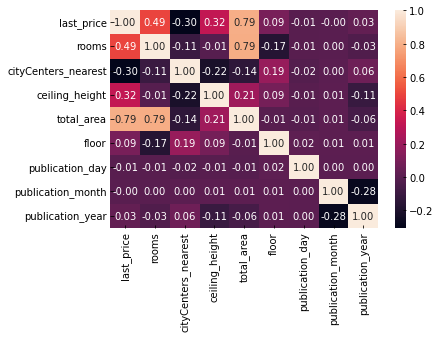

In [388]:
sns.heatmap(spb_corr,annot=True,fmt='0.2f')

<AxesSubplot:>

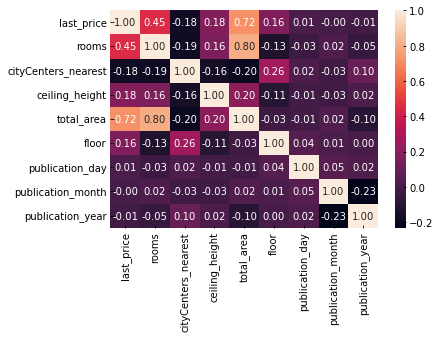

In [389]:
sns.heatmap(spb_center_corr,annot=True,fmt='0.2f')

В центре, по сравнению со всем городом менее выражена корреляция между ценой и количеством комнат(0.45 против 0.49),так же менее выражена корреляция между ценой и площадью квартиры (0.72 и 0.79). Все же стоит отметить, что цена формируются в первую очередь за счет площади и показывает сильную корреляцию в отличие от других параметров.
Дата публикации никак не влияет на вероятность продажи квартиры.Слабая корреляция между параметрами цены и высоты потолка, а также цены и этажа, на котором располагается квартира.



## <a id="conclusion">Вывод</a>

В любом городе на цену квартиры влияет в первую очередь площадь квартиры. Расстояние до центра вносит слабую долю в итоговую цену квартиры, как высота потолков и этаж.
Самая высокая цена на жилье ожидаемо оказалась в Питере, самая низкая - в Выборге.
Наибольшее количество продаж приходится на 45 и 60 сутки, что может быть связано с бронирование квартир и временем заполнения и передачи документов на квартиру, а так же 50% продаж квартир занимает меньше 101 дня. Дата публикации объявления не влияет вероятность продажи квартиры.